<a href="https://colab.research.google.com/github/BuuMinhDucTran/AI_Robotics/blob/main/Houseware_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. IMPORT LIBRARY**

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Flatten,Conv2D,MaxPooling2D
from keras.datasets import mnist, fashion_mnist, cifar10, cifar100
from tensorflow.keras.optimizers import Adam, RMSprop,SGD
from keras.utils import np_utils
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v2 as tf
from tensorflow import keras
import os
import pickle
import pandas as pd
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from keras.preprocessing import  image
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**2. CONNECT GOOGLE DRIVE**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = '/content/drive/MyDrive/Colab Notebooks/Houseware_Classification'

**3. CREATE DATA**

In [3]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)
training_set=train.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Houseware_Classification/train',target_size=(150,150), batch_size=40, class_mode='categorical')
validation_set=validation.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Houseware_Classification/test',target_size=(150,150), batch_size=40, class_mode='categorical')

Found 9795 images belonging to 15 classes.
Found 2658 images belonging to 15 classes.


**4. PROCESS DATA**

In [4]:
training_set.class_indices

{'Blender': 0,
 'Broom': 1,
 'Brush': 2,
 'Cooker': 3,
 'Fan': 4,
 'Glass': 5,
 'Kettle': 6,
 'Knife': 7,
 'Microwave': 8,
 'Pan': 9,
 'Plate': 10,
 'Refrigerator': 11,
 'Spoon': 12,
 'Television': 13,
 'Washing_Machine': 14}

In [5]:
validation_set.class_indices

{'Blender': 0,
 'Broom': 1,
 'Brush': 2,
 'Cooker': 3,
 'Fan': 4,
 'Glass': 5,
 'Kettle': 6,
 'Knife': 7,
 'Microwave': 8,
 'Pan': 9,
 'Plate': 10,
 'Refrigerator': 11,
 'Spoon': 12,
 'Television': 13,
 'Washing_Machine': 14}

**5. CREATE MODEL**

In [8]:
model = Sequential()
model.add(Conv2D(16,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(15,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 18, 18, 64)      

**6. TRAINING MODEL**

In [9]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',  metrics=['accuracy'])
history = model.fit(training_set, epochs = 30, validation_data = validation_set, verbose=1, callbacks=[EarlyStopping(monitor='val_loss', patience=15)])

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


 51/245 [=====>........................] - ETA: 31:21 - loss: 16.3946 - accuracy: 0.1382

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


245/245 [==============================] - 2997s 12s/step - loss: 5.3237 - accuracy: 0.2612 - val_loss: 2.2828 - val_accuracy: 0.3100
Epoch 2/30
245/245 [==============================] - 32s 131ms/step - loss: 1.5253 - accuracy: 0.5359 - val_loss: 1.1537 - val_accuracy: 0.6637
Epoch 3/30
245/245 [==============================] - 33s 134ms/step - loss: 0.8076 - accuracy: 0.7512 - val_loss: 0.8008 - val_accuracy: 0.7765
Epoch 4/30
245/245 [==============================] - 32s 131ms/step - loss: 0.3145 - accuracy: 0.9010 - val_loss: 0.6934 - val_accuracy: 0.8378
Epoch 5/30
245/245 [==============================] - 32s 131ms/step - loss: 0.1520 - accuracy: 0.9571 - val_loss: 1.0313 - val_accuracy: 0.8115
Epoch 6/30
245/245 [==============================] - 32s 130ms/step - loss: 0.0997 - accuracy: 0.9707 - val_loss: 0.7984 - val_accuracy: 0.8593
Epoch 7/30
245/245 [==============================] - 32s 130ms/step - loss: 0.0805 - accuracy: 0.9783 - val_loss: 1.1385 - val_accuracy: 0.8

**7. DRAWING FIGURE**

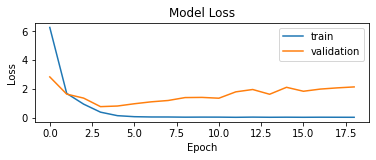

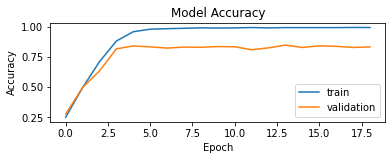

In [ ]:
#Drawing Loss
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'])
plt.show()
#Drawing Accuracy
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'])
plt.show()

In [10]:
score = model.evaluate(validation_set, verbose=0)
print("Loss = {}".format(score[0]))
print("Accuracy = {} ".format( score[1]))

Loss = 2.368124485015869
Accuracy = 0.8472535610198975 


**8. SAVE MODEL**

In [20]:
model.save('Houseware.h5')
Houseware =load_model('Houseware.h5')

9 .CLASSIFICATION

This is Microwave is in a kitchen


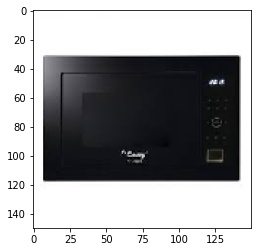

In [21]:
img = image.load_img('lò.jpg', target_size=(150,150)) 
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3) 
img = img.astype('float32')
img = img/255
Houseware=np.argmax(Houseware.predict(img),axis=1)
pred = model.predict(img)
classes = ['Blender','Broom','Brush','Cooker','Fan','Glass','Kettle','Knife','Microwave','Pan','Plate','Refrigerator','Spoon','Television','Washing_Machine']
position = ['kitchen','bathroom','living room','dining room']
#print(np.argmax(pred))
if Houseware==0: print("This is" ,classes[0],"is in a" ,position[0])
elif Houseware==1: print("This is" ,classes[1],"is in a" ,position[0])
elif Houseware==2: print("This is" ,classes[2],"is in a" ,position[1])
elif Houseware==3: print("This is" ,classes[3],"is in a" ,position[0])
elif Houseware==4: print("This is" ,classes[4],"is in a" ,position[2])
elif Houseware==5: print("This is" ,classes[5],"is in a" ,position[3])
elif Houseware==6: print("This is" ,classes[6],"is in a" ,position[0])
elif Houseware==7: print("This is" ,classes[7],"is in a" ,position[0])
elif Houseware==8: print("This is" ,classes[8],"is in a" ,position[0])
elif Houseware==9: print("This is" ,classes[9],"is in a" ,position[0])
elif Houseware==10: print("This is" ,classes[10],"is in a" ,position[3])
elif Houseware==11: print("This is" ,classes[11],"is in a" ,position[0])
elif Houseware==12: print("This is" ,classes[12],"is in a" ,position[3])
elif Houseware==13: print("This is" ,classes[13],"is in a" ,position[2])
elif Houseware==14: print("This is" ,classes[14],"is in a" ,position[1])

In [ ]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from opencv_jupyter_ui import cv2_imshow


model = load_model('Houseware.h5')
name_label = ['Blender','Broom','Brush','Cooker','Fan','Glass','Kettle','Knife','Microwave','Pan','Plate','Refrigerator','Spoon','Television','Washing_Machine']

video_capture = cv2.VideoCapture('RealTimeClassification.mp4')

while True:
    ret, frame = video_capture.read()
    if not ret:
        break
    frame = cv2.resize(frame, (150, 150))
    frame = np.expand_dims(frame, axis=0)
    frame = frame.astype(np.float32)
    frame = frame / 255.0
    
    pred = model.predict(frame)
    pred = np.argmax(pred, axis=1)
    pred = name_label[pred[0]]
    print(pred)

    cv2_imshow('frame', frame[0])
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()

In [22]:
from IPython.display import display, Javascript, Image
# JavaScript to properly create our live video stream using our webcam as input

def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
        async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia({video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
      '<span style="color: red; font-weight: bold;">' +
      'Bấm vào video để dừng</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
       return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [23]:
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import numpy as np
import PIL
import io
import cv2
from keras.models import  load_model

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Receiving Images...'
# initialze bounding box to empty
bbox = ''
count = 0 

# Load model phân loại đồ gia dụng
model_file_path = "Houseware.h5"
vggmodel = load_model(model_file_path)

classes = ['Blender','Broom','Brush','Cooker','Fan','Glass','Kettle','Knife','Microwave','Pan','Plate','Refrigerator','Spoon','Television','Washing_Machine']

while True:
    # Đọc ảnh trả về từ JS
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])

    # Resize để đưa vào model
    frame_p = cv2.resize(frame, dsize=(150,150))
    tensor = np.expand_dims(frame_p, axis=0)
    # Feed vào mạng
    pred = vggmodel.predict(tensor)
    class_id = np.argmax(pred)
    class_name = classes[class_id]

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)
   
    bbox_array = cv2.putText(bbox_array, "{}".format(class_name),
                        (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        (0, 255,0), 2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes
